In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/chatpgpt-prompts/prompts.csv")
print(df.shape)
df.head()

(153, 2)


,act,prompt
0,Linux Terminal,I want you to act as a linux terminal. I will ...
1,English Translator and Improver,"I want you to act as an English translator, sp..."
2,`position` Interviewer,I want you to act as an interviewer. I will be...
3,JavaScript Console,I want you to act as a javascript console. I w...
4,Excel Sheet,I want you to act as a text based excel. you'l...


## Data Visualization

In [2]:
# First, find the word that's highest frequency of occurrence
from collections import Counter
all_text = ' '.join(df['act'])
all_text = all_text.split(' ')
word_counts = Counter(all_text)
word_counts.most_common(5)

[('Generator', 11), ('Coach', 7), ('Teacher', 4), ('AI', 4), ('Developer', 4)]

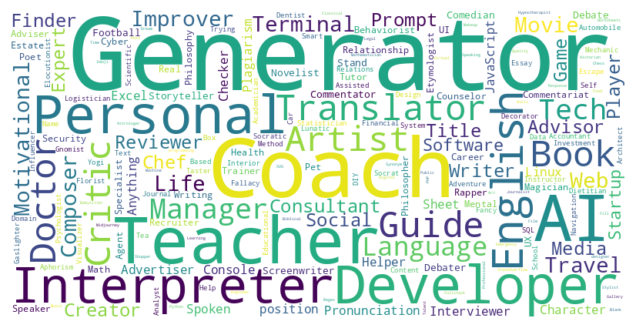

In [3]:
# then we use worldcloud to visualize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['act']))

plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


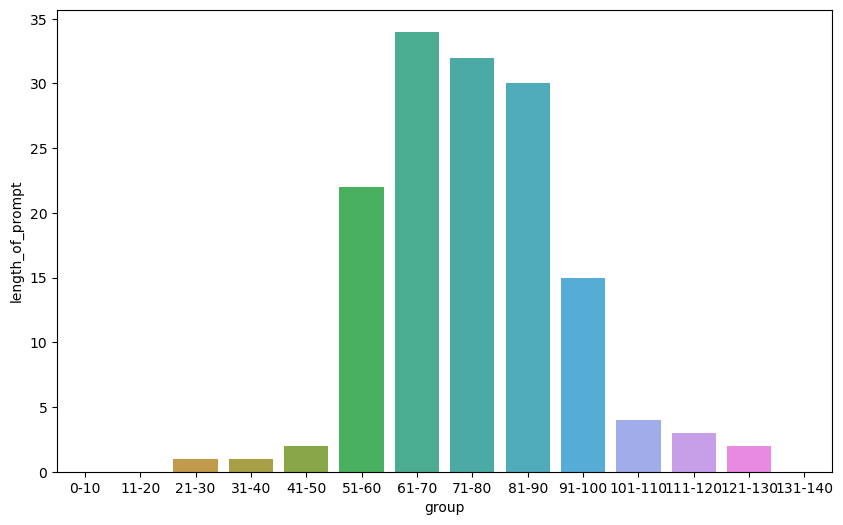

In [4]:
# Second, we want to see the length of prompt
import seaborn as sns
df['length_of_prompt'] = df['prompt'].apply(lambda x: len(x.split(' ')))
bins = range(0, 141, 10)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120', '121-130', '131-140']
df['group'] = pd.cut(df['length_of_prompt'], bins=bins, right=False, labels=labels)
grouped = df.groupby('group')['length_of_prompt'].count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='group', y='length_of_prompt', data=grouped);
# we can find that the number of 61-70 is the most 

In [5]:
# then we want to know the two highest frequency words in dataframe looks like
df[df['act'].str.contains('Generator') | df['act'].str.contains('Coach')]

,act,prompt,length_of_prompt,group
14,Motivational Coach,I want you to act as a motivational coach. I w...,78,71-80
17,Debate Coach,I want you to act as a debate coach. I will pr...,77,71-80
21,Relationship Coach,I want you to act as a relationship coach. I w...,77,71-80
32,Life Coach,I want you to act as a life coach. I will prov...,75,71-80
60,Fancy Title Generator,I want you to act as a fancy title generator. ...,28,21-30
62,Prompt Generator,I want you to act as a prompt generator. First...,141,NaN
67,Smart Domain Name Generator,I want you to act as a smart domain name gener...,71,71-80
94,Public Speaking Coach,I want you to act as a public speaking coach. ...,68,61-70
112,Midjourney Prompt Generator,I want you to act as a prompt generator for Mi...,142,NaN
115,Regex Generator,I want you to act as a regex generator. Your r...,79,71-80


## We have completed the data analysis, now we can proceed to further analyze the text within prompt.
### we use five different way to complete
1. keyword extraction. --> the most frequency words
2. LDA --> to find the theme in prompt
3. Sentiment --> Is there any sentiment in prompt?
4. N-gram --> the most frequency occurring phrases or expressions

[('want', 187), ('act', 143), ('request', 90), ('provide', 79), ('need', 77), ('write', 70), ('help', 62), ('reply', 53), ('explanations', 42), ('like', 41), ('use', 32), ('suggestion', 32), ('create', 30), ('order', 26), ('type', 25), ('code', 25), ('english', 25), ('come', 24), ('make', 23), ('language', 22)]


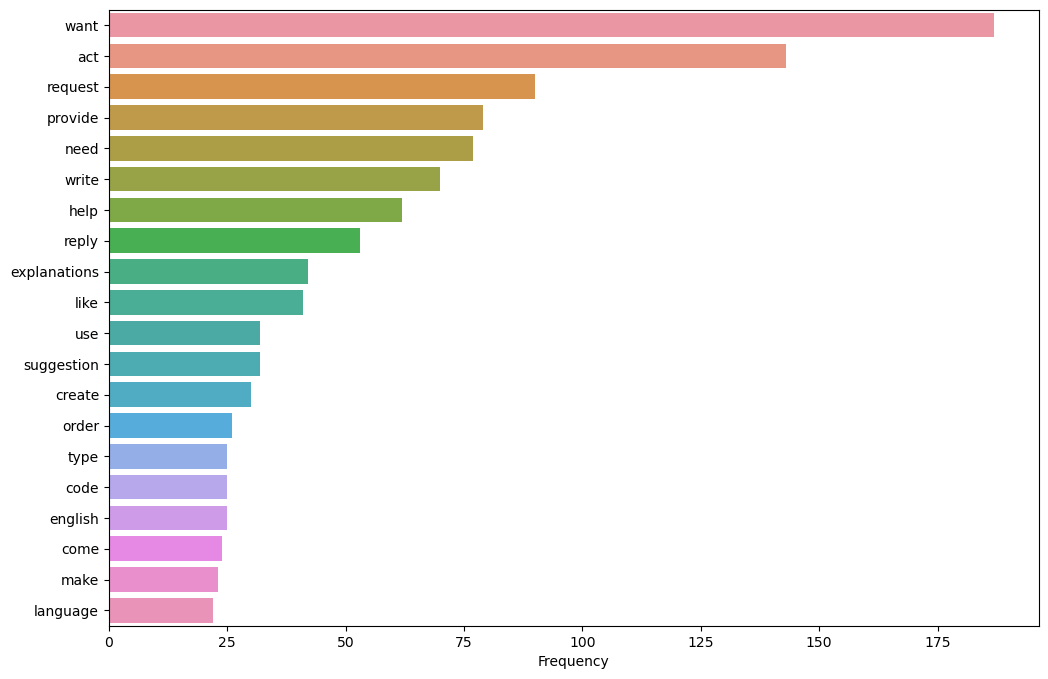

In [6]:
# first, let's try keyword extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['prompt'])
word_freq = Counter()

for word, index in vectorizer.vocabulary_.items():
    word_freq[word] = X[:, index].sum()
common_words = word_freq.most_common(20)
print(common_words)

# plot the result
words, frequency = zip(*common_words)
plt.figure(figsize=(12,8))
sns.barplot(x=list(frequency), y=list(words))
plt.xlabel('Frequency');
# we find that the most frequency words is "want","act","request", 
# the reason is that user uses this words to describe their question

In [7]:
# Let's try LDA to analyze the prompt
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 3
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_model.fit(X)
words_in_topic = {}
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    topic_word = [feature_names[i] for i in topic.argsort()[-11:-1]]
    words_in_topic[f"Topic{topic_idx+1}"] = topic_word
words_in_topic

{'Topic1': ['type',
  'code',
  'sentence',
  'text',
  'english',
  'explanations',
  'like',
  'reply',
  'act',
  'write'],
 'Topic2': ['information',
  'explanations',
  'write',
  'suggestion',
  'help',
  'need',
  'dan',
  'provide',
  'request',
  'want'],
 'Topic3': ['order',
  'use',
  'come',
  'suggestion',
  'create',
  'help',
  'provide',
  'need',
  'request',
  'act']}

1. for topic 1, we can think that this topic is related to some kind of explanation of code.
1. for topic 2, they need some help and ask for more information.
1. for topic 3, it's a little bit similar with topic 3, but more on creating something.

In [8]:
# Let's try sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def sentiment_score(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['nltk_score'] = df['prompt'].apply(sentiment_score)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
# Let's see the result of first prompt
print(df['prompt'].loc[0])
print('-----------')
print(df['nltk_score'].loc[0])

I want you to act as a linux terminal. I will type commands and you will reply with what the terminal should show. I want you to only reply with the terminal output inside one unique code block, and nothing else. do not write explanations. do not type commands unless I instruct you to do so. when i need to tell you something in english, i will do so by putting text inside curly brackets {like this}. my first command is pwd
-----------
Negative


Positive    138
Negative     14
Neutral       1
Name: nltk_score, dtype: int64


Text(0.5, 1.0, 'Sentiment Score Distribution')

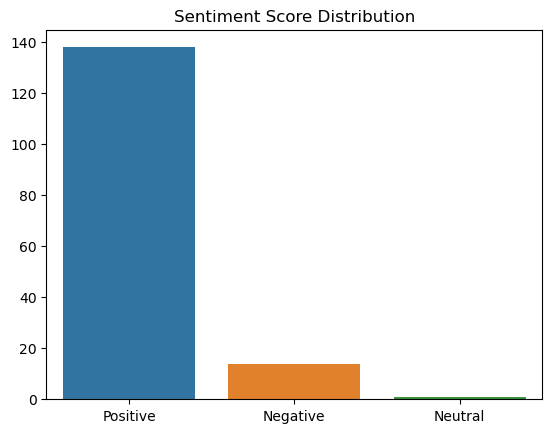

In [10]:
# do some visualization
nltk_score_dist = df['nltk_score'].value_counts()
print(nltk_score_dist)
sns.barplot(x=nltk_score_dist.index, y=nltk_score_dist.values)
plt.title('Sentiment Score Distribution')

Positive    138
Negative      9
Neutral       6
Name: textblob_score, dtype: int64


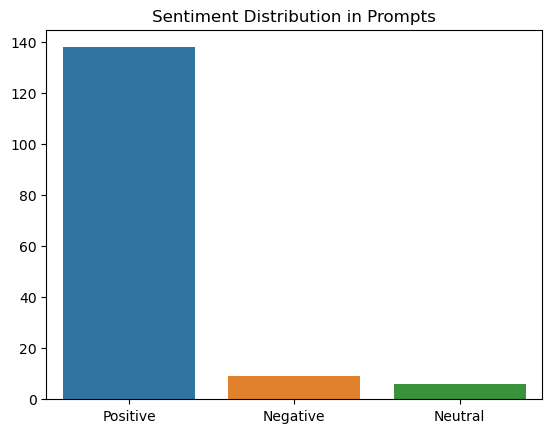

In [11]:
# Also we can see the easy way like textblob
from textblob import TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.03:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['textblob_score'] = df['prompt'].apply(analyze_sentiment)
sentiment_distribution = df['textblob_score'].value_counts()
print(sentiment_distribution)
# Plotting the sentiment distribution
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Sentiment Distribution in Prompts');


In [12]:
len(df[df['nltk_score'] != df['textblob_score']])/len(df)

0.16339869281045752

Looks like the result from two ways is similary

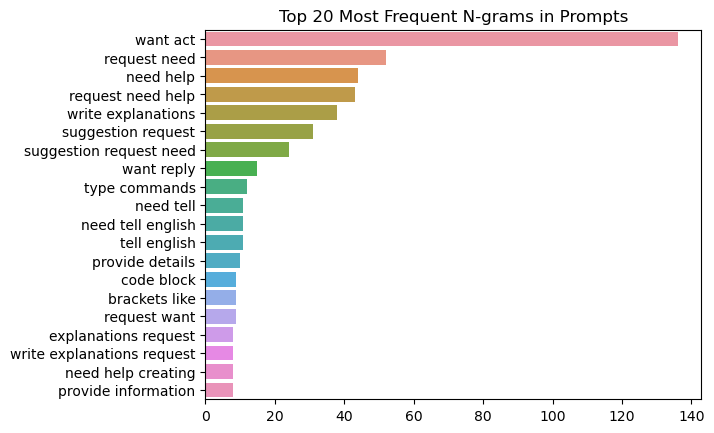

In [13]:
# Final, we do n-gram to find the word sequence
ngram_vec = CountVectorizer(ngram_range=(2,3), stop_words='english')
ngram_matrix = ngram_vec.fit_transform(df['prompt'])
df_ngram = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vec.get_feature_names_out()).sum()
top_ngram = df_ngram.sort_values(ascending=False).head(20)
sns.barplot(y=top_ngram.index, x=top_ngram.values)
plt.title('Top 20 Most Frequent N-grams in Prompts');